# Project: Investigate a Dataset - tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Introduction to the Dataset

The dataset selected for analysis is a collection of information about movies. It contains several columns with significant information about each movie. Below is a description of each column:

#### tmdb-movies

- **id**: Unique identifier for each movie.
- **imdb_id**: IMDb identifier for each movie.
- **popularity**: The popularity score of the movie.
- **budget**: The budget allocated for the production of the movie.
- **revenue**: The revenue generated by the movie.
- **original_title**: The original title of the movie.
- **cast**: Names of the main cast members of the movie.
- **homepage**: The URL of the movie's official website.
- **director**: Name of the director of the movie.
- **tagline**: The tagline associated with the movie.
- **keywords**: Keywords associated with the movie.
- **overview**: A brief overview or summary of the movie.
- **runtime**: The duration of the movie in minutes.
- **genres**: The genres associated with the movie.
- **production_companies**: The production companies involved in making the movie.
- **release_date**: The release date of the movie.
- **vote_count**: The number of votes received by the movie.
- **vote_average**: The average rating given to the movie.
- **release_year**: The year in which the movie was released.
- **budget_adj**: Adjusted budget for inflation.
- **revenue_adj**: Adjusted revenue for inflation.



### List of analysis questions:
```
1. How does the budget of a movie correlate with its revenue?
    - Dependent Variable: Revenue
    - Independent Variable: Budget

2. Are certain production companies associated with higher revenue-generating movies?
    - Dependent Variable: Revenue
    - Independent Variable: Production company

3. Does the runtime of a movie affect its popularity?
    - Dependent Variable: Popularity score
    - Independent Variable: Runtime

4. Are movies released in certain months more likely to have higher revenues?
    - Dependent Variable: Revenue
    - Independent Variable: Release month
```

In [31]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

print("Complete")

Complete


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("Complete")

Complete


<a id='wrangling'></a>

## Data Wrangling

### General Properties

In this section, we'll start by loading the data and performing some initial exploratory analysis to get a better understanding.

### Load the Data

Let's begin by loading the dataset and printing out a few lines to get an overview.


In [2]:
# Load the data
df = pd.read_csv('tmdb-movies.csv')
print("Complete")

Complete


In [3]:
# Display the first 5 rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())
print("Complete")


First few rows of the dataframe:
       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          di

In [4]:
# Get the size of the dataframe
print("Size of the dataframe (rows, columns):", df.shape)
print("Complete")

Size of the dataframe (rows, columns): (10866, 21)
Complete


In [40]:
# Check the data types of each column
print("Data types of each column:")
print(df.dtypes)
print("complete")

Data types of each column:
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object
complete


In [39]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("Complete")


Missing values in each column:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
Complete



## Data Cleaning
 

In [42]:
# We should check on the proportion of missing values in each column 
# to decide if we should fill in the values or drop them.


# Check proportion of missing values in each column
missing_values_percentage = df.isnull().mean() * 100
print("Proportion of missing values in each column:")
print(missing_values_percentage)

print("Complete")

Proportion of missing values in each column:
id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64
Complete


In [44]:
# Drop rows with missing values in specific columns
df.dropna(subset=['director', 'genres'], inplace=True)

# Fill missing values in the 'production_companies' column with "Unknown" 
# since this column is being used for analysis in question 2
df['production_companies'] = df['production_companies'].fillna("Unknown")

print("Complete")


Complete


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are the most popular year by year?

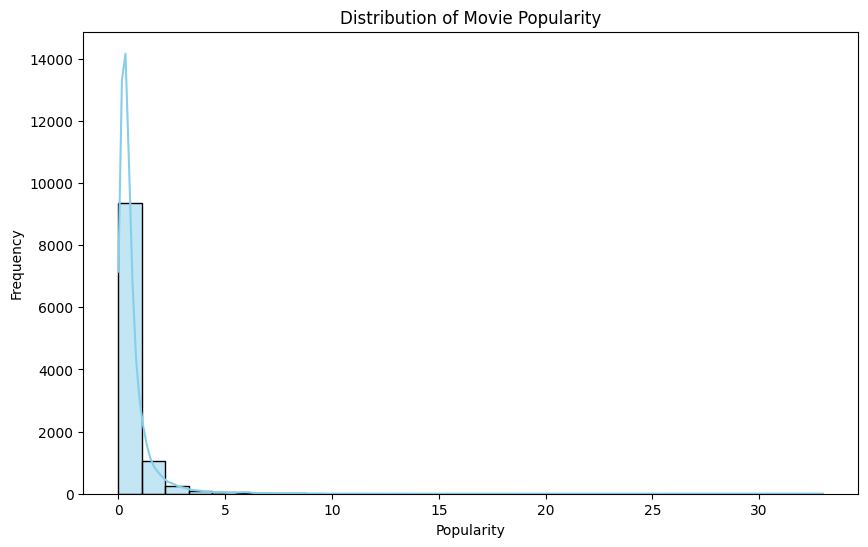

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_distribution(data, x_label, title, bins=30, kde=True, color='skyblue'):
    """
    Visualize the distribution of given data.

    Args:
    - data: The data to be visualized
    - x_label: Label for the x-axis
    - title: Title of the plot
    - bins: Number of bins for histogram (default is 30)
    - kde: Whether to display kernel density estimate (default is True)
    - color: Color of the plot (default is 'skyblue')
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=bins, kde=kde, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.show()

def visualize_genre_popularity_over_years(data, x_label, y_label, title):
    """
    Visualize the popularity trends for each genre over the years.

    Args:
    - data: DataFrame containing genre popularity data
    - x_label: Label for the x-axis
    - y_label: Label for the y-axis
    - title: Title of the plot
    """
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data, x='release_year', y='popularity', hue='genre', linewidth=2.5, palette='tab10')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualization of movie popularity distribution
visualize_distribution(df['popularity'], 'Popularity', 'Distribution of Movie Popularity')


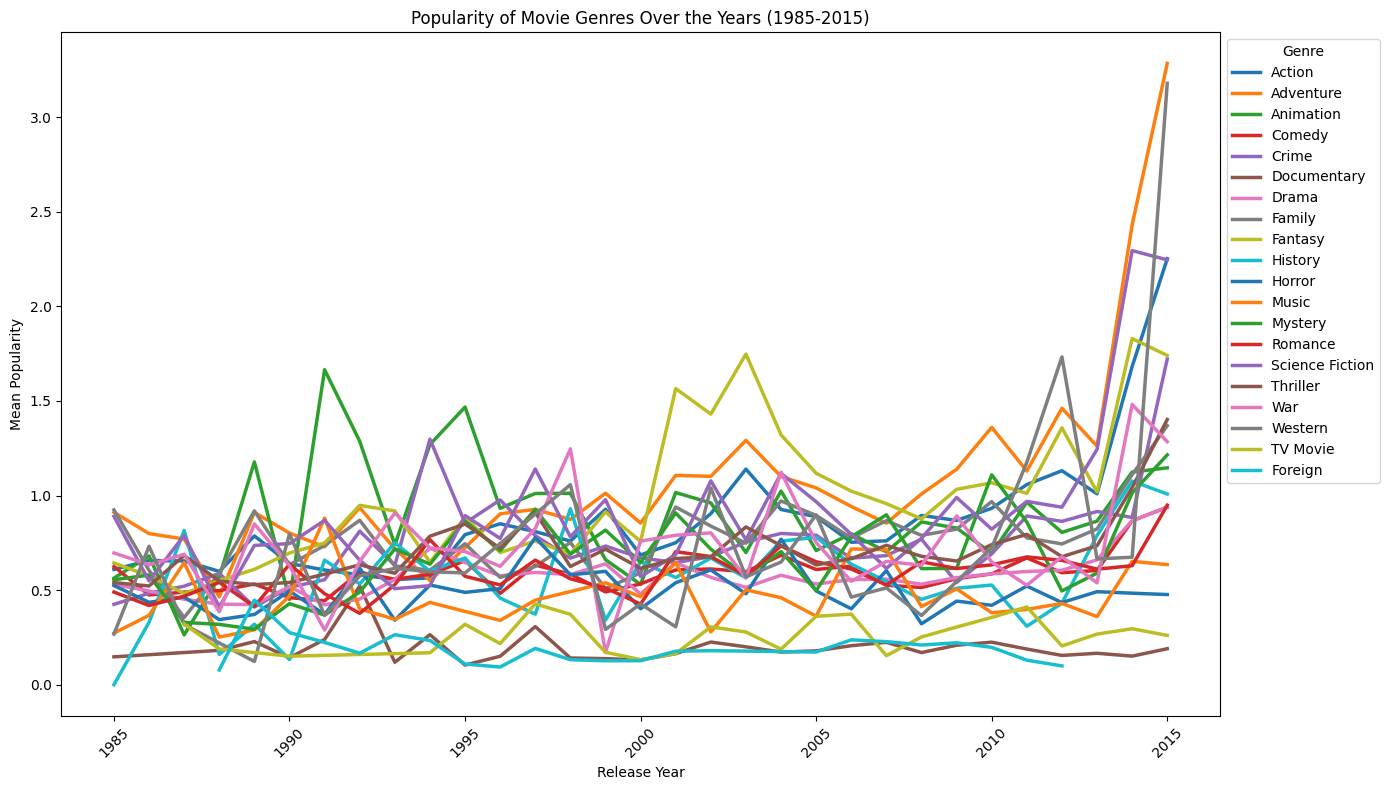

This illustrates how variable genre movies are in terms of popularity. 
As well as change, it also shows that some genres have remained some of the least popular


In [63]:
# Visualization of popularity trends for each genre over the years
visualize_genre_popularity_over_years(genre_popularity, 'Release Year', 'Mean Popularity', 'Popularity of Movie Genres Over the Years (1985-2015)')

print("This illustrates how variable genre movies are in terms of popularity. \nAs well as change, it also shows that some genres have remained some of the least popular")

### Are certain production companies associated with higher revenue-generating movies?

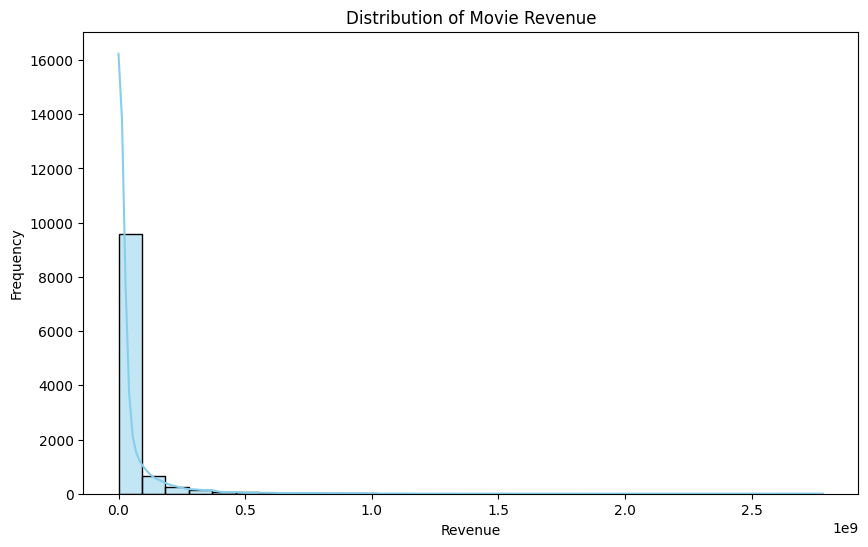

In [60]:
# 1. Distribution of movie revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


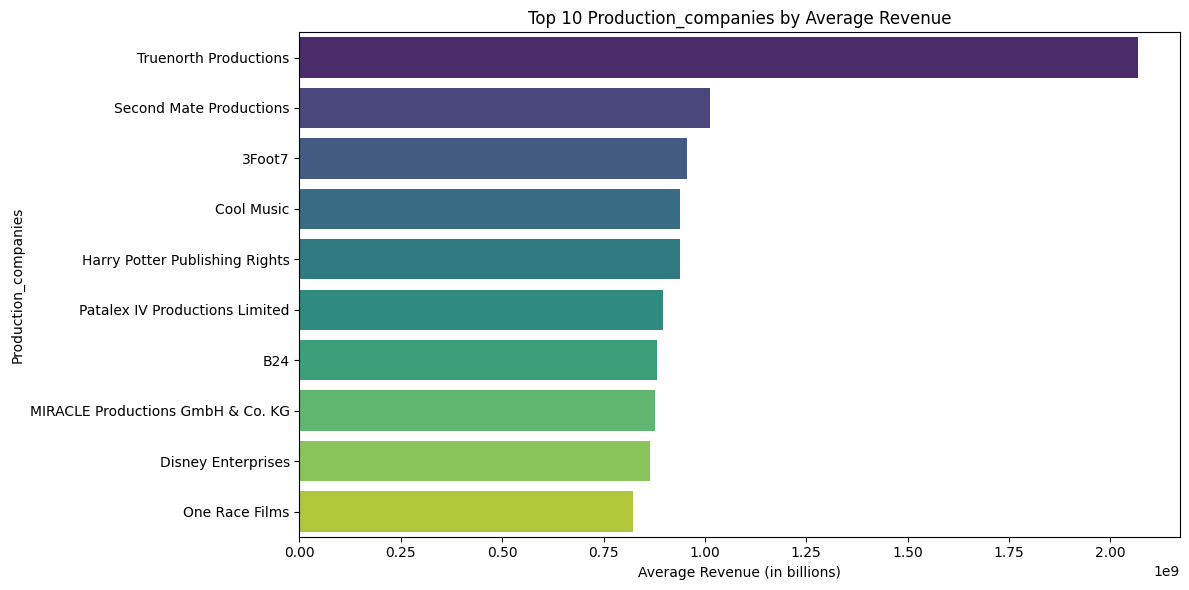

As shown in this plot you can see that one production company, Truenorth Productions, has a substantial increase in revenue compared to other companies


In [65]:
# This whole code will also be able to function as code for groups of companies working together
def process_production_data(df, column_name, single_company=True):
    """
    Process production data by splitting or not splitting a column, computing mean revenue,
    identifying the top companies or groups, and visualizing the revenue distribution.

    Args:
    - df: DataFrame containing the data
    - column_name: Name of the column to process
    - single_company: Boolean indicating whether to consider single companies or groups (default is True)

    Returns:
    - DataFrame of top companies or groups
    """
    if single_company:
        # Split column into separate rows
        split_df = df[column_name].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
        split_df.name = column_name

        # Merge split column with original dataframe
        df_merged = df.drop(column_name, axis=1).join(split_df)

        # Group by company and compute mean revenue
        company_revenue = df_merged.groupby(column_name)['revenue'].mean().reset_index()

        # Identify the top companies with the highest average revenue
        top_companies = company_revenue.nlargest(10, 'revenue')

        # Visualize the revenue distribution across different companies
        plt.figure(figsize=(12, 6))
        sns.barplot(data=top_companies, x='revenue', y=column_name, hue=column_name, palette='viridis', legend=False)
        plt.title(f'Top 10 {column_name.capitalize()} by Average Revenue')
        plt.xlabel('Average Revenue (in billions)')
        plt.ylabel(f'{column_name.capitalize()}')
        plt.tight_layout()
        plt.show()

        return top_companies
    else:
        # Group by production companies and compute mean revenue
        company_revenue = df.groupby(column_name)['revenue'].mean().reset_index()

        # Identify the top production companies with the highest average revenue
        top_companies = company_revenue.nlargest(10, 'revenue')

        # Visualize the revenue distribution across different production companies
        plt.figure(figsize=(12, 6))
        sns.barplot(data=top_companies, x='revenue', y=column_name, hue=column_name, palette='viridis', legend=False)
        plt.title(f'Top 10 Group of {column_name.capitalize()} by Average Revenue')
        plt.xlabel('Average Revenue (in billions)')
        plt.ylabel(f'{column_name.capitalize()}')
        plt.tight_layout()
        plt.show()

        return top_companies

# For single companies
top_single_production_companies = process_production_data(df, 'production_companies', single_company=True)

print("As shown in this plot you can see that one production company, Truenorth Productions, has a substantial increase in revenue compared to other companies")

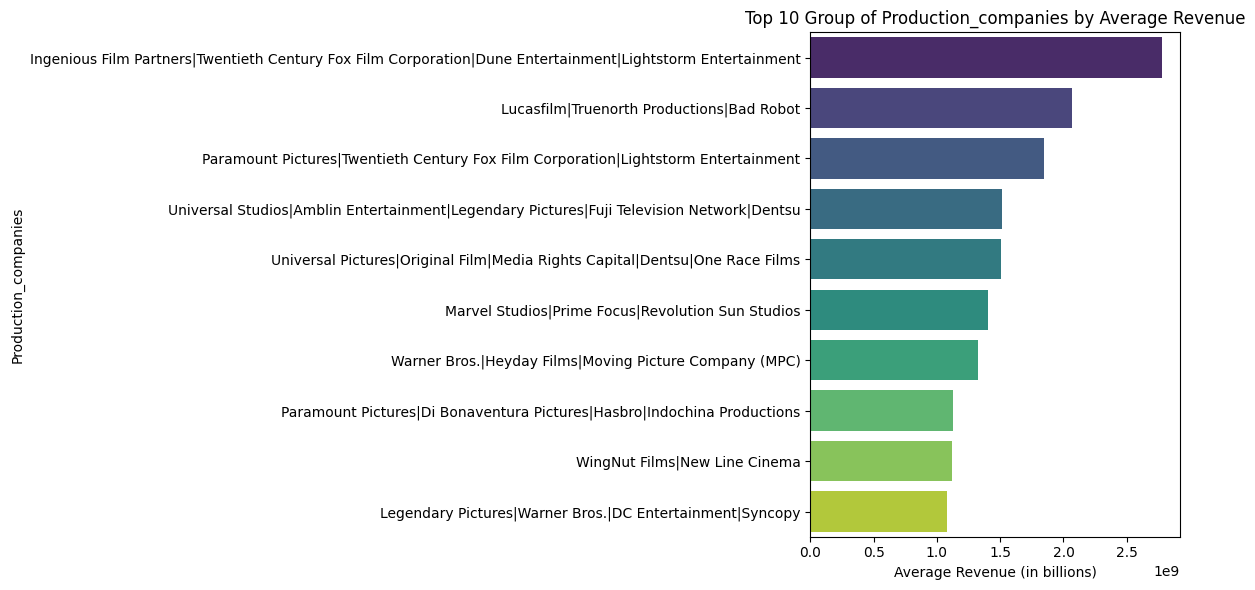

Compared to the previous plot, this one shows that there are certain groups of production companies that, when they work together, see a significant 
increase in revenue when compared to other companies working together


In [72]:
# For groups of companies
top_grouped_production_companies = process_production_data(df, 'production_companies', single_company=False)

print("Compared to the previous plot, this one shows that there are certain groups of production companies that, when they work together, see a significant \nincrease in revenue when compared to other companies working together")

### Does the runtime of a movie affect its popularity?

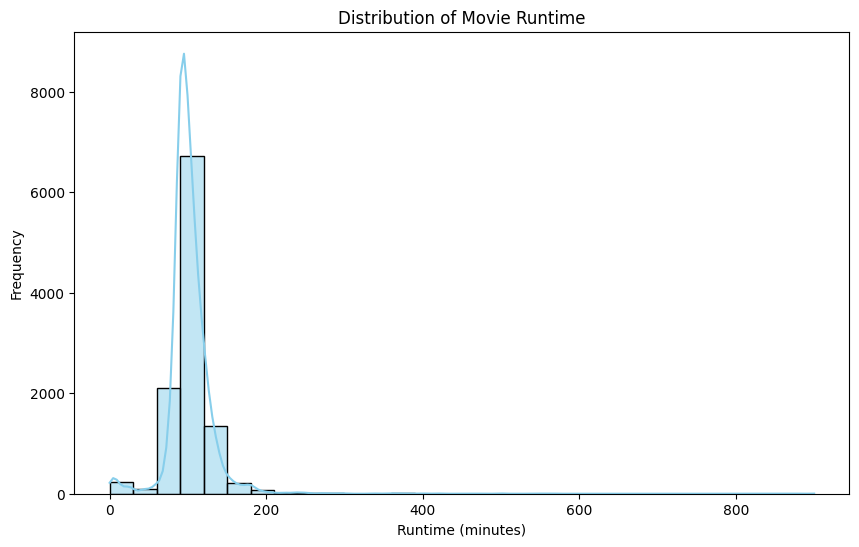

In [61]:
Distribution of movie runtime
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


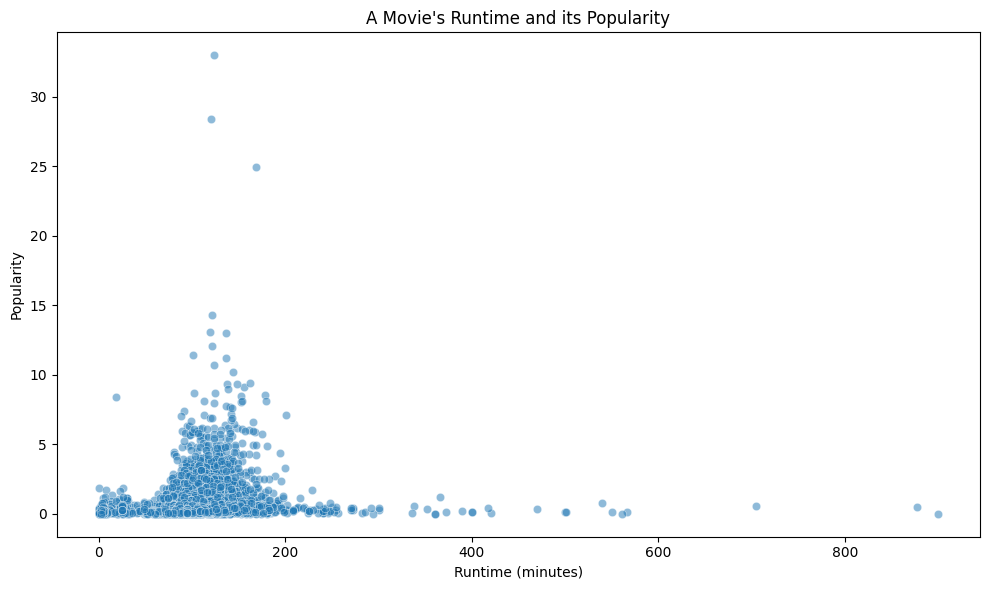

By looking at the current plot, it is clear that the most popular movies are close to the 2 hour mark. However, both plots show that the majority of 
movies also sit in this range. This could be due to previous studies showing that people prefer movies to last around this long


In [71]:
# Plot the relationship between movie runtime and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='popularity', alpha=0.5)
plt.title('A Movie\'s Runtime and its Popularity')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

print("By looking at the current plot, it is clear that the most popular movies are close to the 2 hour mark. However, both plots show that the majority of \nmovies also sit in this range. This could be due to previous studies showing that people prefer movies to last around this long")

### Are movies released in certain months more likely to have higher revenues?

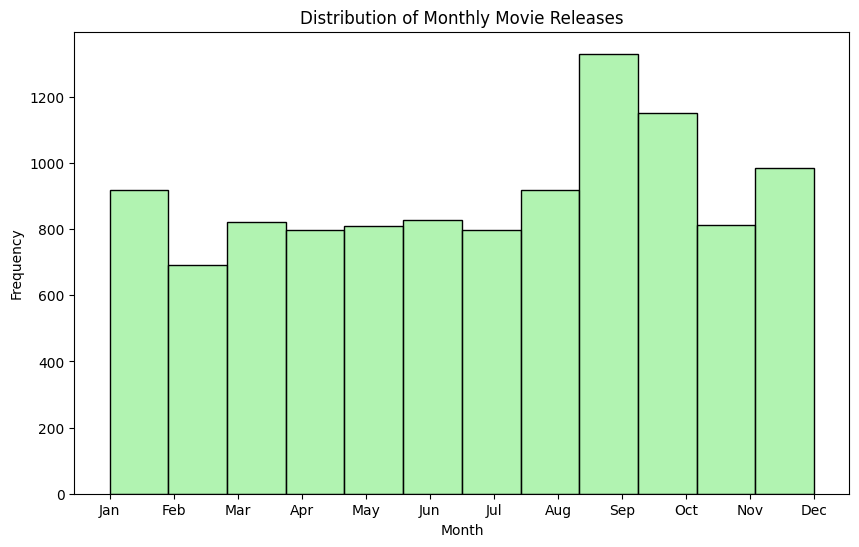

In [62]:
# Here we will explore the frequency of movies and their release month before checking revenue
# Extracting the month from the release_date column
df['release_month'] = pd.to_datetime(df['release_date'], format='%m/%d/%y').dt.month

# Distribution of monthly movie releases
plt.figure(figsize=(10, 6))
sns.histplot(df['release_month'], bins=12, kde=False, color='lightgreen', alpha=0.7)
plt.title('Distribution of Monthly Movie Releases')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


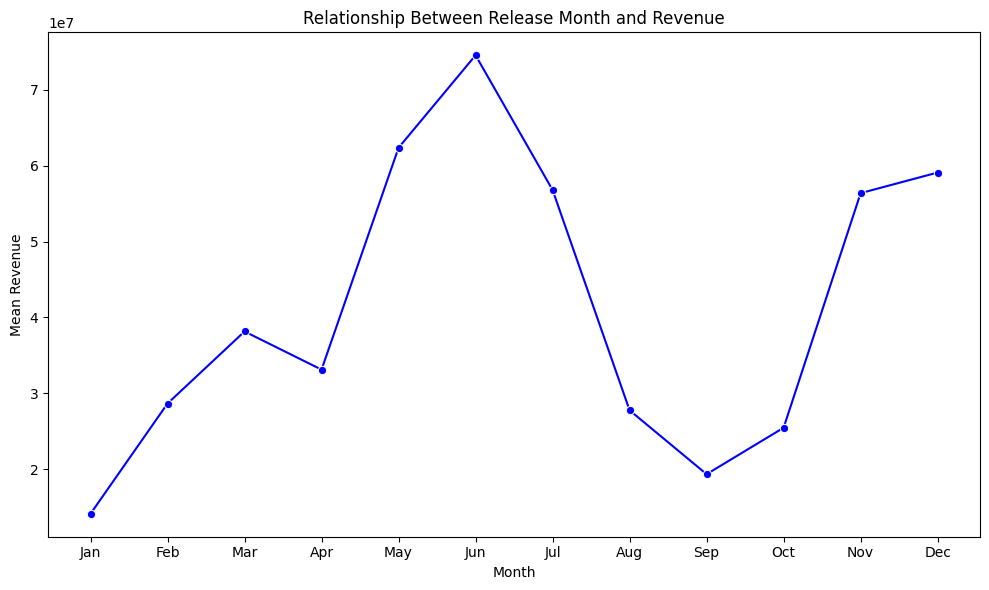

By examining both plots it is clear that movies being relesed in January lack in revenue. As you can see, the frequncy of movies released in January 
is quite high but the revenue return is the lowest. As well, the movies released in June are not the highest but the average revenue is significantly 
higher.


In [70]:
# Extracting the month from release_date column
df['release_month'] = pd.to_datetime(df['release_date'], format='%m/%d/%y').dt.month

# Group by month and compute mean revenue
month_revenue = df.groupby('release_month')['revenue'].mean().reset_index()

# Visualize the revenue trend across different months
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_revenue, x='release_month', y='revenue', marker='o', color='blue')
plt.title('Relationship Between Release Month and Revenue')
plt.xlabel('Month')
plt.ylabel('Mean Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

print("By examining both plots it is clear that movies being relesed in January lack in revenue. As you can see, the frequncy of movies released in January \nis quite high but the revenue return is the lowest. As well, the movies released in June are not the highest but the average revenue is significantly \nhigher.")

<a id='conclusions'></a>
## Conclusions
In conclusion, our exploratory data analysis provided valuable insights into various aspects of the movie industry. Here's a summary of our findings:

- Popular Movie Genres:
  The popularity of movie genres appears to exhibit a cyclical pattern, with the most popular genres changing roughly every decade. Some genres
  experience low popularity over the entire time period, while others see fluctuations in their popularity.

- Revenue and Production Companies:
  Certain production companies, or groups of production companies, consistently generate higher revenues. This suggests that factors such as branding,
  marketing, and production quality may play a significant role in determining a movie's revenue potential.

- Movie Runtime and Popularity:
  The analysis revealed that movies with runtimes around 120-140 minutes tend to be the most popular. However, it's noteworthy that the majority of
  movies produced fall within the 100-150 minute range, indicating that this duration is a common choice among filmmakers.

- Release Month and Revenue:
  There appears to be a relationship between the month of release and movie revenue. Movies released in June tend to generate the highest revenue,
  while January sees the lowest revenue. This trend could be influenced by various factors such as holiday seasons, competition from other releases,
  and audience preferences.
```
Limitations:
```
- While these findings provide valuable insights into the movie industry, it's essential to acknowledge some limitations. For example, the analysis is
  based on historical data and may not fully capture emerging trends or changes in consumer behavior. Additionally, correlation does not imply
  causation, and further research would be needed to understand the underlying factors driving these observed patterns.
  Overall, the analysis offers valuable insights into the dynamics of the movie industry, highlighting opportunities for further research and strategic
  decision-making.
```
Further Research:
```
- To delve deeper into the association between production companies and revenue, future research could focus on analyzing the specific contributions of
  individual companies within multi-company productions.
- Investigating additional factors such as genre trends, marketing strategies, and audience demographics could provide a more comprehensive
  understanding of revenue generation in the movie industry.
- Conducting statistical tests to validate correlations and exploring predictive modeling techniques could enhance the robustness of our analysis.

Overall, our analysis lays the foundation for further exploration and research into the dynamics of the movie industry, highlighting both its complexities and opportunities for deeper insights.


In [38]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 1056255 bytes to Investigate_a_Dataset.html
